In [1]:
!nvidia-smi

Mon Apr 14 03:42:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
print("Pytorch version：")
print(torch.__version__)
print("CUDA Version: ")
print(torch.version.cuda)
print("cuDNN version is :")
print(torch.backends.cudnn.version())

Pytorch version：
2.4.0
CUDA Version: 
12.3
cuDNN version is :
90000


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 17.3 MB/s eta 0:00:00a 0:00:01


In [4]:
!yolo settings datasets_dir='/kaggle/working/dronesbirds-1'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/kaggle/working/dronesbirds-1",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "1bfc3e992d24318da58ddee183be5bf9388a31f26bab1738e986ec4d297417ff",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": false,
  "vscode_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [5]:
import os
import ultralytics

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Dataset Set Up

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.0 MB/s eta 0:00:0000:0100:01
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dronesbirds-1 in yolov11:: 100%|██████████| 14912/14912 [00:02<00:00, 5721.41it/s] 


# Ultralitycs Set Up

In [7]:
from ultralytics import YOLO

In [23]:
os.listdir()

['dronesbirds-1', '.virtual_documents']

In [24]:
directory = os.listdir()[1]
directory

'dronesbirds-1'

In [27]:
os.chdir(directory)

In [28]:
!pwd

/kaggle/working/dronesbirds-1


In [29]:
### INPUT YOUR OUTPUT DETAIL
PROJECT_NAME = 'Birds Detection'
OUTPUT_NAME = 'birds_detection_yolo11m' # Cannot including any space

In [30]:
model = YOLO("yolo11m.pt")
results = model.train(data="data.yaml",
                      epochs=15,
                      imgsz=640,
                      batch=32,
                      project=PROJECT_NAME,
                      name=OUTPUT_NAME,
                      lr0=0.0001,
                      lrf=0.1,
                      exist_ok=True)

100%|██████████| 38.8M/38.8M [00:00<00:00, 220MB/s]


Ultralytics 8.3.107 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Birds Detection, name=birds_detection_yolo11m, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 17.0MB/s]
2025-04-14 03:46:39,995	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-04-14 03:46:40,775	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dronesbirds-1/train/labels... 6582 images, 9 backgrounds, 0 corrupt: 100%|██████████| 6582/6582 [00:05<00:00, 1210.69it/s]


train: New cache created: /kaggle/working/dronesbirds-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.5 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/dronesbirds-1/valid/labels... 562 images, 1 backgrounds, 0 corrupt: 100%|██████████| 562/562 [00:00<00:00, 888.71it/s] 


val: New cache created: /kaggle/working/dronesbirds-1/valid/labels.cache


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Plotting labels to Birds Detection/birds_detection_yolo11m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to Birds Detection/birds_detection_yolo11m
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      15.2G      1.924       1.64      1.425        161        640: 100%|██████████| 206/206 [04:50<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.08s/it]

                   all        562       1285    0.00511       0.11    0.00306    0.00117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      15.3G      1.986      1.472      1.503        102        640:  10%|█         | 21/206 [00:29<04:19,  1.41s/it]

       2/15      15.3G      1.915      1.347      1.485        111        640: 100%|██████████| 206/206 [04:50<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]

                   all        562       1285      0.784      0.642      0.729      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      15.3G      1.885        1.3      1.485        109        640: 100%|██████████| 206/206 [04:46<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]

                   all        562       1285      0.541      0.391      0.422      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      15.2G      1.861      1.242      1.467        102        640: 100%|██████████| 206/206 [04:46<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]

                   all        562       1285      0.569      0.331      0.365       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      15.4G      1.824      1.158      1.426         52        640: 100%|██████████| 206/206 [04:46<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.03it/s]

                   all        562       1285      0.824      0.748       0.79      0.365


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      15.5G      1.777      1.077      1.449         40        640: 100%|██████████| 206/206 [04:47<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.08it/s]

                   all        562       1285      0.858      0.738      0.805      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      15.5G      1.748      1.021      1.426         75        640: 100%|██████████| 206/206 [04:46<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]

                   all        562       1285      0.724      0.578      0.632      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      15.2G      1.706      0.961      1.412         25        640: 100%|██████████| 206/206 [04:45<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.07it/s]

                   all        562       1285      0.884      0.819      0.865      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      15.2G      1.684     0.9324      1.395         22        640: 100%|██████████| 206/206 [04:46<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.05it/s]

                   all        562       1285      0.839      0.785      0.845      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      15.5G      1.669     0.9108      1.392         31        640: 100%|██████████| 206/206 [04:45<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]

                   all        562       1285      0.897      0.861      0.913      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      15.5G      1.634     0.8598      1.362        107        640: 100%|██████████| 206/206 [04:46<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]

                   all        562       1285      0.896      0.844      0.906      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      15.2G      1.612     0.8361      1.361         50        640: 100%|██████████| 206/206 [04:45<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]

                   all        562       1285      0.906      0.872      0.921      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      15.5G      1.585     0.7987      1.331         42        640: 100%|██████████| 206/206 [04:46<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]

                   all        562       1285      0.927      0.881      0.937      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      15.4G       1.56     0.7782      1.323         28        640: 100%|██████████| 206/206 [04:45<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.09it/s]

                   all        562       1285      0.923      0.874      0.931      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      15.2G      1.531     0.7451      1.316         45        640: 100%|██████████| 206/206 [04:46<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]

                   all        562       1285      0.929      0.898      0.943      0.526



15 epochs completed in 1.238 hours.
Optimizer stripped from Birds Detection/birds_detection_yolo11m/weights/last.pt, 40.5MB
Optimizer stripped from Birds Detection/birds_detection_yolo11m/weights/best.pt, 40.5MB

Validating Birds Detection/birds_detection_yolo11m/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.06s/it]


                   all        562       1285      0.929      0.898      0.943      0.526
                  bird         50        676      0.941      0.913      0.953      0.555
                 drone        511        609      0.916      0.883      0.932      0.498
Speed: 0.2ms preprocess, 12.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to Birds Detection/birds_detection_yolo11m


In [32]:
os.listdir()

['README.roboflow.txt',
 'train',
 'yolo11m.pt',
 'Birds Detection',
 'yolo11n.pt',
 'test',
 'valid',
 'README.dataset.txt',
 'data.yaml']

In [ ]:
os.chdir() # Your Output Dir

In [35]:
os.chdir(os.listdir()[0])

In [37]:
os.chdir('weights')

In [44]:
import shutil

In [45]:
file_to_copy = f"{os.getcwd()}/best.pt"

# Specify the path of the destination directory you want to copy to
destination_directory = '/kaggle/working'

# Use the shutil.copy() method to copy the file to the destination directory
shutil.copy(file_to_copy, destination_directory)

'/kaggle/working/best.pt'

In [47]:
os.chdir('/kaggle/working')

In [52]:
os.listdir()

['dronebirds-1', 'best.pt', 'dronesbirds-1', '.virtual_documents']

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmp3u46oyil.PNG'



0: 384x640 24 birds, 51.5ms
Speed: 1.9ms preprocess, 51.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


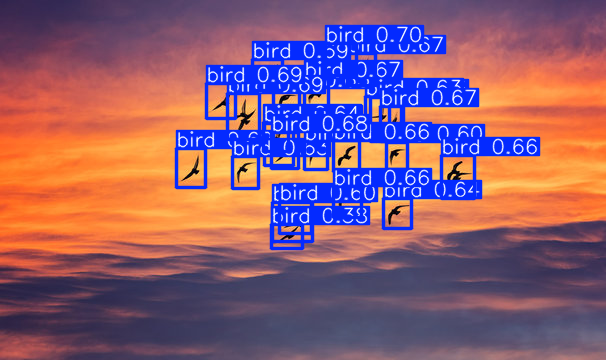

In [54]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import io
model_predict = YOLO("best.pt")

image_data = requests.get('https://t3.ftcdn.net/jpg/02/08/75/86/360_F_208758619_i42Fj7HVUibHegABGZDI2yokxGy54KBd.jpg')
if image_data.ok:
    img = Image.open(io.BytesIO(image_data.content))
    img.show()
    results = model_predict(img)  
    results[0].show()
    results[0].save(filename="result.jpg")